Cài đặt các thư viện ràng buộc

In [53]:
!pip install pandas matplotlib scikit-learn numpy seaborn imbalanced-learn

Import các thư viện cần thiết

In [54]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Đọc dữ liệu

In [55]:
df = pd.read_csv(r'..\parkinsons\parkinsons.data')
print(df.shape)
df

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [57]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Kiểm tra và xóa dữ liệu nhiễu

In [70]:
iso = IsolationForest(contamination=0.05, random_state=42)
y_pred = iso.fit_predict(df.drop(['status', 'name'], axis=1))
df['outlier'] = y_pred
print(df['outlier'].value_counts()) 

df_cleaned = df[df['outlier'] != -1].copy()

df_cleaned.drop(columns='outlier', inplace=True)
df = df_cleaned
print("Du lieu sau khi loc nhieu:", df.shape)

outlier
 1    175
-1     10
Name: count, dtype: int64
Du lieu sau khi loc nhieu: (175, 24)


Tách ra tập thuộc tính và nhãn

In [59]:
X = df.drop(columns=['status','name'])
y = df['status']
print(X.shape, y.shape)

(185, 22) (185,)


Giá trị lớn nhất và nhỏ nhất của dữ liệu

In [60]:
min_values = X.min()
max_values = X.max()
print("Gia tri nho nhat cua moi cot:")
print(min_values)
print("Gia tri lon nhat cua moi cot:")
print(max_values)

Gia tri nho nhat cua moi cot:
MDVP:Fo(Hz)          88.333000
MDVP:Fhi(Hz)        102.145000
MDVP:Flo(Hz)         65.476000
MDVP:Jitter(%)        0.001680
MDVP:Jitter(Abs)      0.000007
MDVP:RAP              0.000680
MDVP:PPQ              0.000920
Jitter:DDP            0.002040
MDVP:Shimmer          0.009540
MDVP:Shimmer(dB)      0.085000
Shimmer:APQ3          0.004550
Shimmer:APQ5          0.005700
MDVP:APQ              0.007190
Shimmer:DDA           0.013640
NHR                   0.000650
HNR                  11.744000
RPDE                  0.256570
DFA                   0.574282
spread1              -7.964984
spread2               0.006274
D2                    1.423287
PPE                   0.044539
dtype: float64
Gia tri lon nhat cua moi cot:
MDVP:Fo(Hz)         260.105000
MDVP:Fhi(Hz)        592.030000
MDVP:Flo(Hz)        239.170000
MDVP:Jitter(%)        0.017190
MDVP:Jitter(Abs)      0.000120
MDVP:RAP              0.009960
MDVP:PPQ              0.010270
Jitter:DDP            0.02

Kiểm tra và xóa các giá trị trùng lặp

In [61]:
duplicates = df.duplicated()
print("Số lượng giá trị trùng lặp:", duplicates.sum())
print(duplicates)
df = df.drop_duplicates()
df.info()

Số lượng giá trị trùng lặp: 0
0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 185, dtype: bool
<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              185 non-null    object 
 1   MDVP:Fo(Hz)       185 non-null    float64
 2   MDVP:Fhi(Hz)      185 non-null    float64
 3   MDVP:Flo(Hz)      185 non-null    float64
 4   MDVP:Jitter(%)    185 non-null    float64
 5   MDVP:Jitter(Abs)  185 non-null    float64
 6   MDVP:RAP          185 non-null    float64
 7   MDVP:PPQ          185 non-null    float64
 8   Jitter:DDP        185 non-null    float64
 9   MDVP:Shimmer      185 non-null    float64
 10  MDVP:Shimmer(dB)  185 non-null    float64
 11  Shimmer:APQ3      185 non-null    float64
 12  Shimmer:APQ5      185 non-null    float

Kiểm tra dữ liệu rỗng

In [62]:
print(df.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


Kiểm tra cân bằng dữ liệu

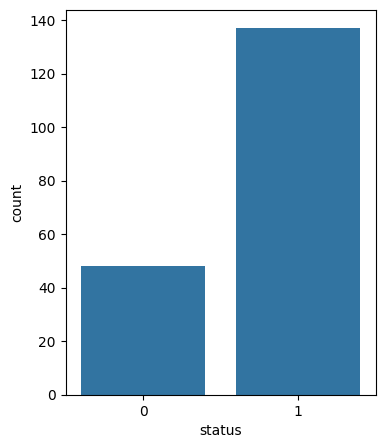

In [63]:
plt.figure(figsize=(4,5))
sns.countplot(x='status', data=df)
plt.show()

Các thuộc tính của tập dữ liệu

In [64]:
feature_names = df.columns[:].tolist()
feature_names.remove('name')
feature_names.remove('status')
print(feature_names)

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


Sinh thêm dữ liệu

In [65]:
smote = SMOTE(sampling_strategy='auto', random_state=42,k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)
print(df_balanced.shape)
df_balanced.info()

(274, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       274 non-null    float64
 1   MDVP:Fhi(Hz)      274 non-null    float64
 2   MDVP:Flo(Hz)      274 non-null    float64
 3   MDVP:Jitter(%)    274 non-null    float64
 4   MDVP:Jitter(Abs)  274 non-null    float64
 5   MDVP:RAP          274 non-null    float64
 6   MDVP:PPQ          274 non-null    float64
 7   Jitter:DDP        274 non-null    float64
 8   MDVP:Shimmer      274 non-null    float64
 9   MDVP:Shimmer(dB)  274 non-null    float64
 10  Shimmer:APQ3      274 non-null    float64
 11  Shimmer:APQ5      274 non-null    float64
 12  MDVP:APQ          274 non-null    float64
 13  Shimmer:DDA       274 non-null    float64
 14  NHR               274 non-null    float64
 15  HNR               274 non-null    float64
 16  RPDE              274 non-null    

Xem lại độ cân bằng của dữ liệu

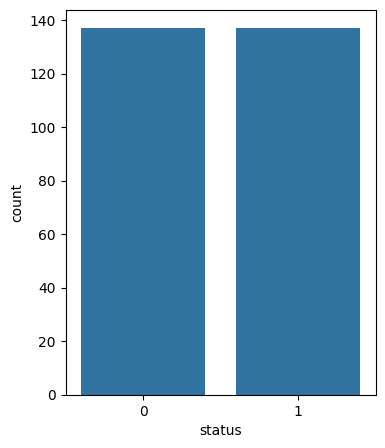

In [66]:
plt.figure(figsize=(4,5))
sns.countplot(x='status', data=df_balanced)
plt.show()

Lưu dữ liệu chưa chuẩn hóa

In [67]:
df_balanced.to_csv(r'..\parkinsons_balanced.csv', index=False)

Chuẩn hóa dữ liệu

In [68]:
scaler = MinMaxScaler()
for i in feature_names:
    column_data = df_balanced[i].values.reshape(-1, 1)
    scaled_column = scaler.fit_transform(column_data)
    df_balanced[i] = scaled_column.flatten()

df_balanced

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,0.184308,0.112592,0.054815,0.397163,0.557522,0.325431,0.494118,0.325189,0.554835,0.535322,...,0.484976,0.182204,0.436042,0.369155,0.960148,0.625933,0.607889,0.390661,0.621659,1
1,0.198327,0.094930,0.278323,0.515796,0.646018,0.427802,0.645989,0.427596,0.840363,0.849294,...,0.752504,0.158261,0.344599,0.470830,0.977024,0.772458,0.769336,0.473145,0.839187,1
2,0.165039,0.059128,0.265288,0.568665,0.734513,0.512931,0.736898,0.513475,0.694192,0.623234,...,0.646448,0.105621,0.418110,0.404416,1.000000,0.699381,0.712294,0.408819,0.745879,1
3,0.165004,0.072927,0.264200,0.534494,0.734513,0.467672,0.648128,0.467481,0.736210,0.678179,...,0.693345,0.109356,0.417782,0.416255,0.975885,0.764056,0.765965,0.436977,0.839966,1
4,0.161150,0.080909,0.260107,0.719536,0.911504,0.632543,0.872727,0.633130,0.887573,0.783359,...,0.852382,0.144507,0.371074,0.375159,0.992813,0.837476,0.533204,0.404336,0.947047,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0.641690,0.216356,0.735848,0.058206,0.026549,0.083411,0.062146,0.083320,0.028620,0.024138,...,0.032603,0.017416,0.784141,0.325103,0.667504,0.093676,0.394320,0.248231,0.081788,0
270,0.908515,0.305310,0.962825,0.031828,0.018204,0.050087,0.051120,0.050125,0.081097,0.070727,...,0.096981,0.035238,0.628051,0.424376,0.241390,0.174924,0.208531,0.392282,0.119157,0
271,0.907307,0.317749,0.959027,0.052784,0.026549,0.074026,0.068535,0.073693,0.114070,0.094508,...,0.135853,0.040356,0.581472,0.484753,0.231930,0.183906,0.306658,0.411530,0.153480,0
272,0.843584,0.280045,0.927347,0.084869,0.026549,0.114184,0.069599,0.114398,0.078106,0.070573,...,0.093000,0.032299,0.636218,0.155303,0.317354,0.166300,0.220044,0.329152,0.124256,0


Lưu dữ liệu đã chuẩn hóa

In [69]:
df_balanced.to_csv(r'..\parkinsons_balanced_scaler.csv', index=False)